In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from math import sqrt
from operator import itemgetter

# Q1

In [2]:
A=np.matrix([[0.27,-0.4,0.32],[0.31,0.37,-0.61],[0.15,0.05,-0.39]])
At=A.transpose()
A.mean(0)

matrix([[ 0.24333333,  0.00666667, -0.22666667]])

In [3]:
np.inner(At[0],At[1])

matrix([[0.0142]])

In [4]:
np.inner(At[0],At[2])

matrix([[-0.1612]])

In [5]:
np.inner(At[1],At[2])

matrix([[-0.3732]])

# answer D

# Q2

In [6]:
def partial_derivative(x1,x2):
    pd1=4*x1**3+4
    pd2=2+2*x2**3
    return pd1,pd2
# partial_derivative(1,1)

In [7]:
def gradient_descent(x1,x2,step_size,steps):
    for i in range(steps):
        new_x1=x1-step_size*partial_derivative(x1,x2)[0]
        new_x2=x2-step_size*partial_derivative(x1,x2)[1]
        print(new_x1,new_x2)
        x1=new_x1
        x2=new_x2

In [8]:
gradient_descent(1,1,0.01,10)

0.92 0.96
0.84885248 0.92230528
0.784386835730623 0.8866141550652238
0.7250826769816582 0.8526750793331845
0.6698343365363304 0.8202762493027096
0.6178127382894448 0.7892377405457865
0.5683801567781277 0.759405476580896
0.5210354119214566 0.730646544271022
0.47537742793336984 0.7028455133498411
0.4310803259501681 0.675901514724815


# Q3

In [9]:
train_data=pd.read_csv('data/diabetes_train_data.csv')
validate_data=pd.read_csv('data/diabetes_validate_data.csv')
train_data

,Glucose,BloodPressure,Outcome
0,115,98,0
1,142,60,0
2,116,72,0
3,126,60,1
4,78,70,0
...,...,...,...
509,139,64,0
510,96,122,0
511,101,86,1
512,141,0,1


In [10]:
validate_data

,Glucose,BloodPressure,Outcome
0,98,58,0
1,112,75,0
2,108,64,0
3,107,80,0
4,136,90,0
...,...,...,...
249,106,70,0
250,95,82,1
251,0,74,0
252,143,66,1


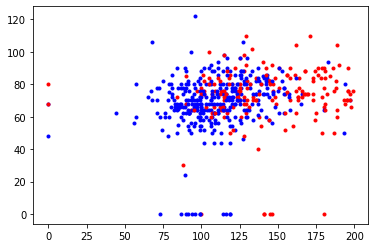

In [24]:
for i in range(len(train_data)):
    if train_data['Outcome'][i]==0:
        plt.plot(train_data['Glucose'][i],train_data['BloodPressure'][i],'b.')
    if train_data['Outcome'][i]==1:
        plt.plot(train_data['Glucose'][i],train_data['BloodPressure'][i],'r.')

# plt.xlabel='Glucose'
# plt.ylabel='Blood pressure'
plt.show()

In [12]:
def distance(p1,p2):
    ans=sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    return ans

In [31]:
def diabetic(k,predicted):
    red=0
    for i in range(k):
        red+=predicted[i][1]
    if red>k/2:
        return 1
    else:
        return 0
# red(2,[(0,1),(0,3)],[])

In [49]:
def knn(k,train_data,validate_data):
    correct=0
    misclassified=0
    bigger_list=[]
    for i in range(len(validate_data)):
        distances=[]
        for j in range(len(train_data)):
            dist=distance((validate_data['Glucose'][i],validate_data['BloodPressure'][i]),(train_data['Glucose'][j],train_data['BloodPressure'][j]))
            distances.append((dist,train_data['Outcome'][j]))
        distances=sorted(distances,key=itemgetter(0))
        bigger_list.append(distances)
        
    for i in range(len(bigger_list)):
        if(diabetic(k,bigger_list[i])==validate_data['Outcome'][i]):
            correct+=1
        if(diabetic(k,bigger_list[i])==1 and validate_data['Outcome'][i]==0):
            misclassified+=1
    return correct/len(validate_data), misclassified

knn(3,train_data,validate_data)

(0.6929133858267716, 36)

for k=1 accuracy is 67,7%

# Q4

In [14]:
a=np.matrix([2,1.5,0,-2,0,1,3,2.5,0,3,3.5,0,-2,3,1,2,3,0,-2,1,1,-1.5,1,1])
a=a.reshape(8,3)
a

matrix([[ 2. ,  1.5,  0. ],
        [-2. ,  0. ,  1. ],
        [ 3. ,  2.5,  0. ],
        [ 3. ,  3.5,  0. ],
        [-2. ,  3. ,  1. ],
        [ 2. ,  3. ,  0. ],
        [-2. ,  1. ,  1. ],
        [-1.5,  1. ,  1. ]])

In [15]:
y=np.matrix([-0.078,-0.227,0.165]).transpose()
y

matrix([[-0.078],
        [-0.227],
        [ 0.165]])

In [16]:
b=np.zeros(8)
for i in range(len(b)):
    if (y[0,0]*a[i,0]+y[1,0]*a[i,1]+y[2,0])>0:
        b[i]=1
b

array([0., 1., 0., 0., 0., 0., 1., 1.])

In [17]:
t1=np.arange(-2,3)
t2=0.726872 - 0.343612*t1

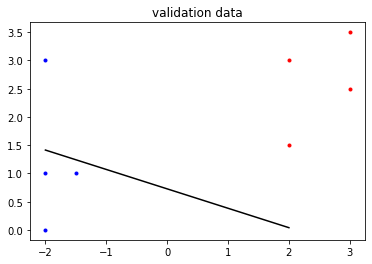

In [22]:
for i in range(len(a)):
    if(a[i,2]==0.0):
        plt.plot(a[i,0],a[i,1],'r.')
    else:
        plt.plot(a[i,0],a[i,1],'b.')
plt.plot(t1,t2,'k-')
plt.plot()
# plt.xlabel(r'$x_1$')
# plt.ylabel(r'$x_2$')
plt.title('validation data')
plt.show()

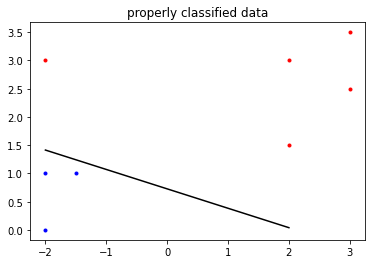

In [20]:
for i in range(len(a)):
    if(b[i]==0.0):
        plt.plot(a[i,0],a[i,1],'r.')
    else:
        plt.plot(a[i,0],a[i,1],'b.')
plt.plot(t1,t2,'k-')
# plt.xlabel('$x_1$')
# plt.ylabel('$x_2$')
plt.title('properly classified data')
plt.show()

## confusion matrix

In [21]:
k=a.transpose()[2]
confusion=np.zeros(4).reshape(2,2)

for i in range(len(b)):
    if(k[0,i]==0 and b[i]==0):
        confusion[0,0]+=1
    if(k[0,i]==1 and b[i]==1):
        confusion[1,1]+=1
    if(k[0,i]==1 and b[i]==0):
        confusion[1,0]+=1
    if(k[0,i]==0 and b[i]==1):
        confusion[0,1]+=1

confusion

array([[4., 0.],
       [1., 3.]])

# answer D

1 out of 4 samples  in class 1 in validation set is misclassified as 0